In [2]:
import pandas as pd 

df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')



In [ ]:
%pip install rasterio
%pip install rioxarray

In [4]:
%pip install keyring 

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Filter CSV File to after 1970

In [6]:
import pandas as pd 

df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')


df['date_x'] = pd.to_datetime(df['dt'])

# Filtering the DataFrame to include only dates after 1970
filtered_df = df[df['date_x'] > '1950-01-01']

# Displaying the filtered DataFrame
filtered_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,date_x
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950-02-01
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950-03-01
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950-04-01
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950-05-01
1217,1950-06-01,25.454,0.209,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950-06-01


# Group by Country - Average of Avg Temperature

In [7]:
avg_temp_by_country = df.groupby('Country')['AverageTemperature'].mean()
avg_temp_by_country.sort_values()
avg_temp_df = avg_temp_by_country.reset_index()
avg_temp_df['AverageTemperature_F'] = avg_temp_df['AverageTemperature'] * 9/5 + 32
avg_temp_by_country_sorted = avg_temp_df.sort_values(by='AverageTemperature')

avg_temp_by_country_sorted.head(10)

,Country,AverageTemperature,AverageTemperature_F
30,Russia,3.958878,39.125980
6,Canada,5.109462,41.197032
7,Chile,5.692277,42.246098
44,Ukraine,7.041033,44.673859
16,Germany,8.916234,48.049221
45,United Kingdom,9.459038,49.026268
15,France,10.402644,50.724760
36,South Korea,10.681885,51.227392
46,United States,11.257246,52.263042
37,Spain,11.448704,52.607667


# Group by Country - Average of Avg Temperature - Top 10

In [8]:
avg_temp_by_country_sorted = avg_temp_df.sort_values(by='AverageTemperature', ascending =False)

avg_temp_by_country_sorted.head(10)

,Country,AverageTemperature,AverageTemperature_F
38,Sudan,29.081291,84.346324
47,Vietnam,27.193984,80.949170
42,Thailand,27.164733,80.896520
34,Somalia,27.151964,80.873535
5,Burma,26.735193,80.123347
18,Indonesia,26.659057,79.986303
33,Singapore,26.523103,79.741585
29,Philippines,26.448334,79.607002
31,Saudi Arabia,26.427309,79.569157
26,Nigeria,26.361323,79.450381


# Group by Country - Average of Avg Temperature - Bottom 10

In [9]:
avg_temp_by_country_sorted = avg_temp_df.sort_values(by='AverageTemperature')

avg_temp_by_country_sorted.head(10)

,Country,AverageTemperature,AverageTemperature_F
30,Russia,3.958878,39.125980
6,Canada,5.109462,41.197032
7,Chile,5.692277,42.246098
44,Ukraine,7.041033,44.673859
16,Germany,8.916234,48.049221
45,United Kingdom,9.459038,49.026268
15,France,10.402644,50.724760
36,South Korea,10.681885,51.227392
46,United States,11.257246,52.263042
37,Spain,11.448704,52.607667


# Group by City - Average of Avg Temperature

In [10]:
avg_temp_by_city = df.groupby('City')['AverageTemperature'].mean()
avg_temp_by_city.sort_values()
avg_temp_city_df = avg_temp_by_city.reset_index()
avg_temp_city_df['AverageTemperature_F'] = avg_temp_city_df['AverageTemperature'] * 9/5 + 32
avg_temp_by_city_sorted = avg_temp_city_df.sort_values(by='AverageTemperature')

avg_temp_by_city_sorted.head(10)

,City,AverageTemperature,AverageTemperature_F
34,Harbin,3.625744,38.526339
79,Saint Petersburg,3.918045,39.052480
65,Moscow,3.999711,39.199479
64,Montreal,4.445014,40.001025
19,Changchun,4.923798,40.862836
81,Santiago,5.692277,42.246098
96,Toronto,5.773911,42.393040
48,Kiev,7.041033,44.673859
85,Shenyang,7.214980,44.986964
92,Taiyuan,7.976806,46.358251


# Group by City - Average of Avg Temperature - Top 10

In [11]:
avg_temp_by_city_sorted = avg_temp_city_df.sort_values(by='AverageTemperature', ascending =False)

avg_temp_by_city_sorted.head(10)

,City,AverageTemperature,AverageTemperature_F
97,Umm Durman,29.081291,84.346324
57,Madras,28.417858,83.152145
42,Jiddah,27.692066,81.845719
35,Ho Chi Minh City,27.193984,80.949170
8,Bangkok,27.164733,80.896520
63,Mogadishu,27.151964,80.873535
30,Fortaleza,27.008640,80.615551
36,Hyderabad,26.869335,80.364803
87,Surabaya,26.809904,80.257828
75,Rangoon,26.735193,80.123347


# Group by City - Average of Avg Temperature - Bottom 10

In [12]:
avg_temp_by_city_sorted = avg_temp_city_df.sort_values(by='AverageTemperature')

avg_temp_by_city_sorted.head(10)

,City,AverageTemperature,AverageTemperature_F
34,Harbin,3.625744,38.526339
79,Saint Petersburg,3.918045,39.052480
65,Moscow,3.999711,39.199479
64,Montreal,4.445014,40.001025
19,Changchun,4.923798,40.862836
81,Santiago,5.692277,42.246098
96,Toronto,5.773911,42.393040
48,Kiev,7.041033,44.673859
85,Shenyang,7.214980,44.986964
92,Taiyuan,7.976806,46.358251


# Group by Date - Average of Avg Temperature - Line Graph

In [13]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model instance
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

# Now you can use the model for fitting and making predictions

In [15]:
from sklearn.metrics import r2_score

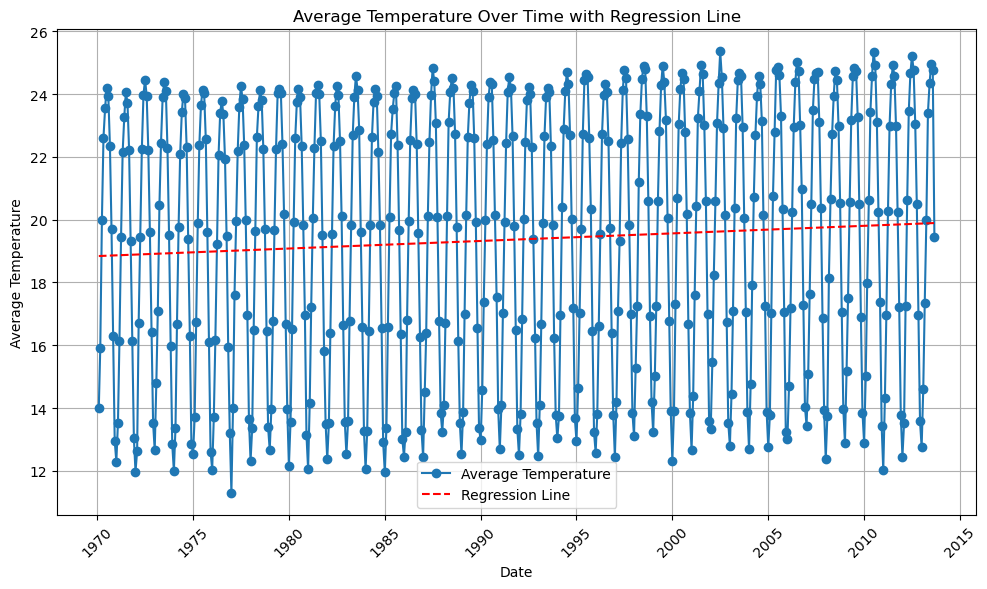

Correlation Coefficient: 1.0
R^2 Value: 0.005079365504678468


In [16]:
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas


# Grouping by date and calculating the average temperature for each date
filtered_df = df[df['date_x'] > '1970-01-01']
avg_temp_by_date = filtered_df.groupby('date_x')['AverageTemperature'].mean()

# Creating x and y data for regression
x = np.arange(len(avg_temp_by_date)).reshape(-1, 1)
y = avg_temp_by_date.values.reshape(-1, 1)

# Performing linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculating the correlation coefficient (Pearson correlation)
corr_coef = np.corrcoef(x.ravel(), y_pred.ravel())[0, 1]

# Calculating the coefficient of determination (R^2)
r2_value = r2_score(y, y_pred)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_by_date.index, avg_temp_by_date.values, marker='o', linestyle='-', label='Average Temperature')
plt.plot(avg_temp_by_date.index, y_pred, color='red', linestyle='--', label='Regression Line')
plt.title('Average Temperature Over Time with Regression Line')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Correlation Coefficient: {corr_coef}")
print(f"R^2 Value: {r2_value}")

In [17]:
df['date_x'] = pd.to_datetime(df['dt'])

# Filtering the DataFrame to include only dates after 1970
filtered_df = df[df['date_x'] > '1970-01-01']

# Displaying the filtered DataFrame
filtered_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,date_x
1453,1970-02-01,28.436,0.270,Abidjan,Côte D'Ivoire,5.63N,3.23W,1970-02-01
1454,1970-03-01,28.400,0.265,Abidjan,Côte D'Ivoire,5.63N,3.23W,1970-03-01
1455,1970-04-01,27.900,0.176,Abidjan,Côte D'Ivoire,5.63N,3.23W,1970-04-01
1456,1970-05-01,26.901,0.255,Abidjan,Côte D'Ivoire,5.63N,3.23W,1970-05-01
1457,1970-06-01,25.860,0.291,Abidjan,Côte D'Ivoire,5.63N,3.23W,1970-06-01


In [18]:

import geoviews as gv


In [19]:
!pip install cartopy


In [20]:
!pip install geoviews 


In [21]:
!pip install bokeh 

In [22]:
import geoviews as gv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
dataset= pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
print(dataset.shape)


(239177, 7)


In [24]:
print(dataset.describe())

       AverageTemperature  AverageTemperatureUncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000


In [1]:
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas


# Grouping by date and calculating the average temperature for each date
filtered_df = df[df['date_x'] > '1970-01-01']
avg_temp_by_date = filtered_df.groupby('date_x')['AverageTemperature'].mean()

# Creating x and y data for regression
x = np.arange(len(avg_temp_by_date)).reshape(-1, 1)
y = avg_temp_by_date.values.reshape(-1, 1)

# Performing linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculating the correlation coefficient (Pearson correlation)
corr_coef = np.corrcoef(x.ravel(), y_pred.ravel())[0, 1]

# Calculating the coefficient of determination (R^2)
r2_value = r2_score(y, y_pred)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_by_date.index, avg_temp_by_date.values, marker='o', linestyle='-', label='Average Temperature')
plt.plot(avg_temp_by_date.index, y_pred, color='red', linestyle='--', label='Regression Line')
plt.title('Average Temperature Over Time with Regression Line')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Correlation Coefficient: {corr_coef}")
print(f"R^2 Value: {r2_value}")

plt.show()
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['maxtemp'])
plt.show()

NameError: name 'df' is not defined

In [ ]:


plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['maxtemp'])
plt.show()

In [ ]:
import pandas as pd 
pd.read_csv ('GlobalLandTemperaturesbyState.csv')
import geoviews as gv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['maxtemp'])
plt.show()
lr = Ridge()
lr = Ridge

lr.fit(lr.df[['Year'],['Sample Size']])
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['maxtemp'])
plt.show()


In [ ]:
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns  # Corrected import for Seaborn

# Ensure 'df' is loaded with data
# df = pd.read_csv('path_to_your_data.csv')  # Uncomment and modify with the correct path

# Grouping by date and calculating the average temperature for each date
filtered_df = df[df['date_x'] > '1970-01-01']
avg_temp_by_date = filtered_df.groupby('date_x')['AverageTemperature'].mean()

# Creating x and y data for regression
x = np.arange(len(avg_temp_by_date)).reshape(-1, 1)
y = avg_temp_by_date.values.reshape(-1, 1)

# Performing linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculating the correlation coefficient and the R^2 value
corr_coef = np.corrcoef(x.ravel(), y.ravel())[0, 1]
r2_value = r2_score(y, y_pred)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_by_date.index, avg_temp_by_date.values, marker='o', linestyle='-', label='Average Temperature')
plt.plot(avg_temp_by_date.index, y_pred, color='red', linestyle='--', label='Regression Line')
plt.title('Average Temperature Over Time with Regression Line')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Correlation Coefficient: {corr_coef}")
print(f"R^2 Value: {r2_value}")

# Using histplot for the distribution of 'maxtemp'
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.histplot(dataset['maxtemp'])  # Ensure 'dataset' is defined and loaded
plt.show()




In [ ]:
import numpy as np 
# Creating x and y data for regression
x = np.arange(len(avg_temp_by_date)).reshape(-1, 1)
y = avg_temp_by_date.values.reshape(-1, 1)

# Performing linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculating the correlation coefficient (Pearson correlation)
corr_coef = np.corrcoef(x.ravel(), y.ravel())[0, 1]

# Calculating the coefficient of determination (R^2)
r2_value = r2_score(y, y_pred)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_by_date.index, avg_temp_by_date.values, marker='o', linestyle='-', label='Average Temperature')
plt.plot(avg_temp_by_date.index, y_pred, color='red', linestyle='--', label='Regression Line')
plt.title('Average Temperature Over Time with Regression Line')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Correlation Coefficient: {corr_coef}")
print(f"R^2 Value: {r2_value}")